# Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is crucial for developing effective machine learning models. EDA brings out understanding your data in detail. You understand each variable individually by calculating frequency counts, visualizing the distributions, etc. Also the relationships between the various combinations of the predictor and response variables by creating scatterplots, correlations, etc.

EDA is typically part of every machine learning / predictive modeling project, especially with tabular datasets.

### Why EDA?
<ol> 
<p> Understand which variables could be important in predicting the Y (response). </p>
<p> Generate insights that give us more understanding of the business context and performance </p>
</ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_iris = pd.read_csv("Dataset/iris.csv")

In [3]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Dataset dimension

In [4]:
print (f"Shape of the iris dataset: {df_iris.shape}")

Shape of the iris dataset: (150, 5)


### Check duplicates and missing values

In [5]:
print (f"Duplicate rows: {df_iris.duplicated().isna().sum()}")

Duplicate rows: 0


### Describe the dataset

In [6]:
print (f"Dataset description: {df_iris.describe()}")

Dataset description:        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
## Feature names 
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_iris[cols]

### Correlation among features
This section explains how attributes (input variables) are correlated to each other. The visualisation of correlation is plotted with the seaborn package in form of heatmaps. This correlation analysis an understanding of the relationship between the features and helps in dropping off redundant features. It is also an essential step for feature selection. 

In [8]:
## Correlation between features
corr = X.corr()
print (f"Correlation of features: \n {corr}")

Correlation of features: 
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Text(0.5, 1.0, 'Heatmap analysis')

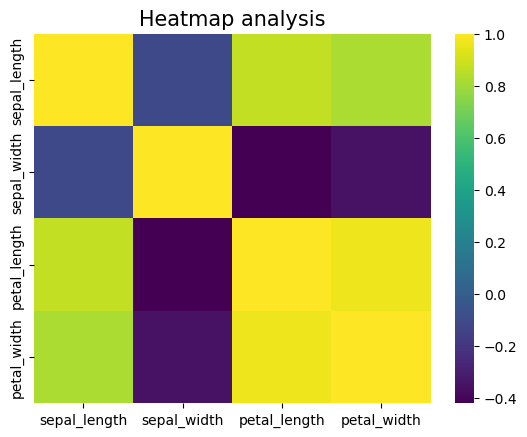

In [9]:
import seaborn as sns
sns.heatmap(corr, cmap='viridis')
plt.title("Heatmap analysis",fontsize=15)

### Information about datatypes of attributes in the dataset
Finds a description for numerical and categorical entries.

In [10]:
## data type of each column
print (f"Info about dataset: \n {df_iris.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Info about dataset: 
 None


### Standardisation of input features
Scales the input attributes to a given range of values. StandardScaler() converts the data values to zero mean and unit standard deviation.
MinMaxScaler() scales the data within the maximum and minimum value of the respective feature column.

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()   ## converting the mean to be zero and standard deviation to be unity
#scaler = MinMaxScaler()     ## scale data within a respective range (min and max of feature value)

X_std = scaler.fit_transform(X)
print ("Standardisation of data: \n", X_std[:10])

Standardisation of data: 
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


### Normalising the data by scaling each sample to have a unit standard

In [12]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)
print ("Normalization of data: \n",X_norm[:10])

Normalization of data: 
 [[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]]


### Data Visualizations [Histogram plot]
Enables to look into visualisation in data and identify data-imbalance or data-distribution shape

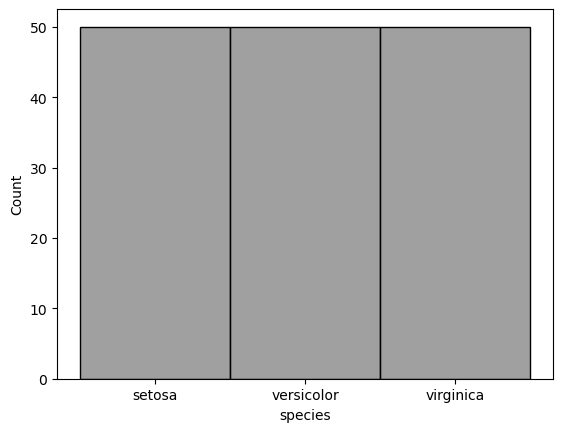

In [13]:
import seaborn as sns
sns.histplot(df_iris.iloc[:,-1],color='gray',edgecolor='black')
plt.show()

## Pandas profiling
Pandas profiling python package is a tool that gives the HTML format report. It is very useful for EDA of data as it collates all the information into a single report making a thorough EDA of data before modelling. The pandas profiling generates a complete report consisting of different statistics about the data that includes:

<ol>
<p> Essentials: datatype, missing values, unique values, etc </p>
<p> Quantile Statistics like min value, Q1, median, Q3, interquartile range,</p>
<p> Descriptive Statistics like mean, median, mode, SD, etc,</p>
<p> Duplicated rows/column values,</p>
<p> Histograms and correlations</p>
</ol>
 

### How to install pandas profiling package
pip install pandas-profiling

In [14]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(df_iris, title="Iris data Profile Report")
profile.to_file("iris_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
## See the profile report 
profile                                        